# Step 1: Import Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Implement Drawing Function

In [5]:
def nothing(x):
    pass

In [8]:
def draw(event, x, y, flags, params):
    global ix, iy, drawing, color, image, brush_size, points, lines

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    if event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.line(image, (ix, iy), (x, y), color, thickness=brush_size)
            points.append([(ix, iy) , (x, y), color, brush_size])
            ix, iy = x, y
    if event==cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(image, (ix, iy), (x, y), color, thickness=brush_size)
        points.append([(ix, iy) , (x, y), color, brush_size])
        lines.append([points])
        points.clear()

In [6]:
def draw(event, x, y, flags, params):
    global ix, iy, drawing, color, image, brush_size, lines

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        # Start a new line segment
        lines.append([])  # New line
        
    if event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(image, (ix, iy), (x, y), color, thickness=brush_size)
            # Store the segment (start, end, color, size)
            lines[-1].append(((ix, iy), (x, y), color, brush_size))
            ix, iy = x, y
            
    if event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(image, (ix, iy), (x, y), color, thickness=brush_size)
        lines[-1].append(((ix, iy), (x, y), color, brush_size))

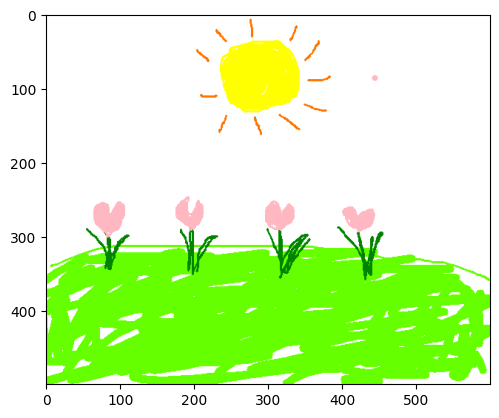

In [11]:
image = np.ones((500,600,3), dtype=np.uint8) * 255
white_board = image.copy()
drawing = False
ix, iy = 0, 0
min_color = 0
max_color = 255
color = (0, 0, 0)
min_size = 1
max_size = 10
brush_size = 3
points = []
lines = []

cv2.namedWindow("Paint")
cv2.createTrackbar('Size', 'Paint', min_size, max_size, nothing)
cv2.createTrackbar('R', 'Paint', min_color, max_color, nothing)
cv2.createTrackbar('G', 'Paint', min_color, max_color, nothing)
cv2.createTrackbar('B', 'Paint', min_color, max_color, nothing)
cv2.setMouseCallback("Paint",draw)

while True:
    red = cv2.getTrackbarPos('R', 'Paint')
    green = cv2.getTrackbarPos('G', 'Paint')
    blue = cv2.getTrackbarPos('B', 'Paint')
    brush_size = cv2.getTrackbarPos('Size', 'Paint')
    color = (blue, green, red)
    cv2.imshow("Paint",image)
    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    elif key == ord("r"):
        image = white_board.copy()
        lines.clear()
    elif key == ord("z"):
        if lines:
            image = white_board.copy()
            lines.pop()
            for line in lines:
                for point in line:
                    cv2.line(image, point[0], point[1], point[2], point[3])

cv2.destroyAllWindows()
plt.imshow(image[...,::-1])

# Step 3: Store Image

In [12]:
cv2.imwrite('Picture.jpg', image)

True